In [35]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [2]:
import pathlib
train_root = pathlib.Path("/media/putto/Windows 10/Users/putto/Data/CCPD2019")
print(train_root)

/media/putto/Windows 10/Users/putto/Data/CCPD2019


In [7]:
all_image_paths = list(train_root.glob('*/*'))
all_image_paths = [str(item) for item in all_image_paths]
print("There are %d images in total." % len(all_image_paths))

There are 351973 images in total.


In [27]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image)
    image = tf.cast(image, tf.float32) / 255.0  # normalize to [0,1] range
    return image

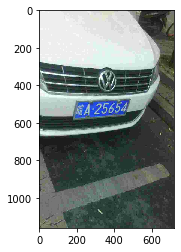

In [46]:
import matplotlib.pyplot as plt

image_path = all_image_paths[1234]
plt.imshow(load_and_preprocess_image(image_path))
print()

In [36]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)